# Calculation of the sudakov using MC method
Import libraries which will be needed

In [2]:
from math import pi, sqrt, log, exp
from ROOT import TH1D, TCanvas, gRandom,gStyle

Welcome to JupyROOT 6.12/07


The alpha strong function, input q is in GeV

In [2]:
def alphaS(q):
    QCDlam = 0.2  #Lambda QCD for 3 flavours
    Qlam0  = 1    #scale freezing
    nf     = 3    #number of flavours
    beta0  = (33 - 2*nf) / 6 
    Qval = max(Qlam0, q)
    return pi / (beta0*log(Qval/QCDlam))

The splitting function at the LO without $\alpha_S$

In [3]:
def Splitting(z):
    return # TODO

Integrand inside of the Sudakov

In [4]:
def suda(t1, t2):
    q2 = # TODO: pick scale in [t1,t2] with 1/x pdf

    z1min,z1max = 0.01, 0.99
    z1= # TODO: pick fraction in [z1min,z1max]
    z = 1. - z1 # only useful of Pqq
    
    q = sqrt(q2)
    integrand = # TODO
    weight = # TODO
    return integrand*weight 

Function to calculate the Sudakov

In [5]:
def Sudakov(t1, t2):
    sum0 = sum00 = 0
    npoints = 1000
    for i in range(npoints):
        ff = suda(t1, t2)
        sum0  +=  ff
        sum00 +=  ff**2
    sum0  /= npoints
    sum00 /= npoints
    sigma2 = sum00 - sum0*sum0
    error = sqrt(sigma2/npoints)

    sudakov = exp(-sum0)
    sudError = sudakov*error #Error of the sudakov
    return sudakov, sudError

Book a histogram

In [4]:
TH1D.SetDefaultSumw2()
ntmax = 20
tmin, tmax = 1., 500. 
histo1 = TH1D("sudakov",";q^{2};sudakov", ntmax, tmin, tmax)

Loop over data points in the histogram

In [7]:
for nt in range(1, ntmax+1):
    t1 = # TODO: take bin center
    sudakov, sudError = Sudakov(t1, tmax)
    print " t2 = ", tmax , " t1 = ", t1 , " Delta_S = " , sudakov , " +-" , sudError 
    histo1.SetBinContent(nt, sudakov)
    histo1.SetBinError(nt, sudError)

 t2 =  500.0  t1 =  13.475  Delta_S =  0.00254276353573  +- 0
 t2 =  500.0  t1 =  38.425  Delta_S =  0.0341903409223  +- 0
 t2 =  500.0  t1 =  63.375  Delta_S =  0.0497398635377  +- 0
 t2 =  500.0  t1 =  88.325  Delta_S =  0.116500104878  +- 0
 t2 =  500.0  t1 =  113.275  Delta_S =  0.162819864285  +- 0
 t2 =  500.0  t1 =  138.225  Delta_S =  0.156774558814  +- 0
 t2 =  500.0  t1 =  163.175  Delta_S =  0.257305234915  +- 0
 t2 =  500.0  t1 =  188.125  Delta_S =  0.343508447289  +- 0
 t2 =  500.0  t1 =  213.075  Delta_S =  0.318915520495  +- 0
 t2 =  500.0  t1 =  238.025  Delta_S =  0.450458364721  +- 0
 t2 =  500.0  t1 =  262.975  Delta_S =  0.469277436552  +- 0
 t2 =  500.0  t1 =  287.925  Delta_S =  0.519629205121  +- 0
 t2 =  500.0  t1 =  312.875  Delta_S =  0.569457722549  +- 0
 t2 =  500.0  t1 =  337.825  Delta_S =  0.599333164413  +- 0
 t2 =  500.0  t1 =  362.775  Delta_S =  0.664715601466  +- 0
 t2 =  500.0  t1 =  387.725  Delta_S =  0.709433942912  +- 0
 t2 =  500.0  t1 =  412.

Plot the Sudakov factor

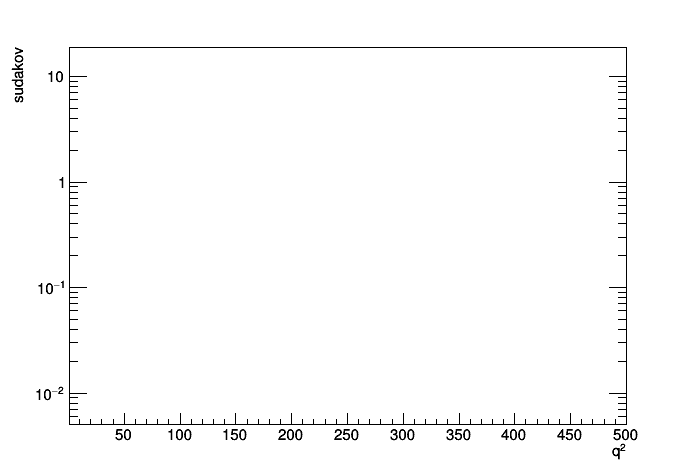

In [5]:
c = TCanvas()
gStyle.SetPadTickY(1) # ticks at right side
gStyle.SetOptStat(0)  # get rid of statistics box
c.SetLogy()
histo1.Draw()
c.Draw()